In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [96]:
data = pd.read_csv('history_export.txt', sep="|", header = None)
data.columns = ["Time", "URL"]
print(data)

                      Time                                                URL
0      2017-02-17 19:32:23  https://in.mathworks.com/matlabcentral/newsrea...
1      2017-02-17 19:32:21  http://stackoverflow.com/questions/12220615/ho...
2      2017-02-17 19:32:18                  http://yann.lecun.com/exdb/mnist/
3      2017-02-17 19:32:10  https://productforums.google.com/d/topic/chrom...
4      2017-02-17 19:32:10  https://productforums.google.com/forum/#!topic...
5      2017-02-17 19:32:07  https://www.google.co.in/url?sa=t&rct=j&q=&esr...
6      2017-02-17 19:31:49  https://www.google.co.in/search?q=export+brosw...
7      2017-02-17 19:29:49  http://go.microsoft.com/fwlink/?LinkID=219472&...
8      2017-02-17 19:29:49             http://www.msn.com/?ocid=wispr&pc=u477
9      2017-02-17 19:29:49       http://www.msn.com/en-in/?ocid=wispr&pc=u477
10     2017-02-17 19:29:48  http://stackoverflow.com/questions/2562092/how...
11     2017-02-17 19:27:16  http://localhost:8888/notebooks/topi

In [97]:
data['Time'] = pd.to_datetime(data['Time'])

In [98]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)

In [99]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'arishika@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [ ]:

for idx in range(len(data)):
#for idx in range(100):
    #print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if(type(r)!=str):
            soup = BeautifulSoup(r.text, 'lxml')
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"
#print (domainList)

In [ ]:
data.to_csv('chrome_history.csv')

In [40]:
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
data.Domain = set(domainList)
docs = data.Domain
#print(docs)
#docs = domainList.unique()

{b'How to access Google Chrome browser history programmatically on local machine - Stack Overflow', b'GRE: 334, TOEFL: 119, Undergrad: 9.3 CGPA (Computer Science from Indian Institute of Technology, Guwahati (IIT-G), Guwahati), Work experience: 2 months - Interested in Computer Science / Information Technology (Fall 2017) | Yocket - Study abroad guide for masters', b'Jupyter Notebook', b'Tender Love \xe2\x9d\xa4\xef\xb8\x8f - An Indie/Folk/Pop Playlist - YouTube', b'MATLAB Central - reading MNIST database', b'An Intuitive Explanation of Convolutional Neural Networks \xe2\x80\x93 the data science blog', b'University of Michigan - Ann Arbor (U Mich), Michigan, United States - Review and ranking - Study Engineering Masters in United States (USA) | Yocket - Study abroad guide for masters', b'Columbia University (Columbia), New York, United States - Review and ranking - Study Engineering Masters in United States (USA) | Yocket - Study abroad guide for masters', b'CS698U, IITK -- Gaurav Shar

In [41]:
data.head()

Unnamed: 0                Time  \
0           0 2017-02-17 19:32:23   
1           1 2017-02-17 19:32:21   
2           2 2017-02-17 19:32:18   
3           3 2017-02-17 19:32:10   
4           4 2017-02-17 19:32:10   

                                                 URL  
0  https://in.mathworks.com/matlabcentral/newsrea...  
1  http://stackoverflow.com/questions/12220615/ho...  
2                  http://yann.lecun.com/exdb/mnist/  
3  https://productforums.google.com/d/topic/chrom...  
4  https://productforums.google.com/forum/#!topic...

In [42]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models


In [43]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [54]:
doc_set = list(docs)
print(doc_set)

[b'How to access Google Chrome browser history programmatically on local machine - Stack Overflow', b'GRE: 334, TOEFL: 119, Undergrad: 9.3 CGPA (Computer Science from Indian Institute of Technology, Guwahati (IIT-G), Guwahati), Work experience: 2 months - Interested in Computer Science / Information Technology (Fall 2017) | Yocket - Study abroad guide for masters', b'Jupyter Notebook', b'Tender Love \xe2\x9d\xa4\xef\xb8\x8f - An Indie/Folk/Pop Playlist - YouTube', b'MATLAB Central - reading MNIST database', b'An Intuitive Explanation of Convolutional Neural Networks \xe2\x80\x93 the data science blog', b'University of Michigan - Ann Arbor (U Mich), Michigan, United States - Review and ranking - Study Engineering Masters in United States (USA) | Yocket - Study abroad guide for masters', b'Columbia University (Columbia), New York, United States - Review and ranking - Study Engineering Masters in United States (USA) | Yocket - Study abroad guide for masters', b'CS698U, IITK -- Gaurav Shar

In [64]:
texts = []

# loop through document list
for i in doc_set:
    #print(i)
    try:
        i = str(i)
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        #print (raw)
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass
#print (tokens)
#print (texts)

In [65]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [66]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=20)

In [67]:
ldamodel.print_topics(5)

[(0,
  '0.106*"b" + 0.047*"googl" + 0.028*"search" + 0.028*"mnist" + 0.021*"x98" + 0.019*"x9f" + 0.016*"xb0" + 0.015*"3" + 0.015*"databas" + 0.015*"student"'),
 (1,
  '0.050*"b" + 0.034*"matlab" + 0.019*"convolut" + 0.019*"neural" + 0.019*"network" + 0.019*"python" + 0.019*"scratch" + 0.019*"india" + 0.019*"cnn" + 0.019*"tutori"'),
 (2,
  '0.277*"xc2" + 0.133*"xc3" + 0.127*"xa0" + 0.106*"xa4" + 0.026*"xa5" + 0.015*"x87" + 0.013*"x82" + 0.011*"xbe" + 0.011*"xa8" + 0.011*"x80"'),
 (3,
  '0.076*"xe0" + 0.071*"xa4" + 0.040*"b" + 0.024*"technolog" + 0.020*"scienc" + 0.020*"comput" + 0.017*"undergrad" + 0.017*"9" + 0.017*"work" + 0.017*"gre"'),
 (4,
  '0.070*"master" + 0.067*"studi" + 0.062*"b" + 0.052*"unit" + 0.052*"state" + 0.044*"abroad" + 0.044*"guid" + 0.044*"yocket" + 0.039*"univers" + 0.029*"engin"')]

In [68]:
ldamodel.get_topic_terms(0,10)

[(8, 0.1063315162612285),
 (2, 0.047403478496329324),
 (94, 0.027715795713804305),
 (59, 0.027619032766403991),
 (122, 0.02110815916529284),
 (127, 0.018928005891060237),
 (129, 0.01601871666242554),
 (18, 0.014526302548076747),
 (57, 0.014518908620352752),
 (124, 0.014512772211565359)]

In [69]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

ImportError: No module named 'wordcloud'

In [79]:
topic = [0]*len(data)
for idx in range(len(data)):

#topic = [0]*100
#for idx in range(len(doc_set)):
    test_idx = doc_set.index(doc_set[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))
#print(topic)

[4, 0, 3, 4, 0, 2, 0, 1, 0, 3, 0, 0, 3, 1, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 1, 3, 0, 0, 1, 0, 1, 0, 2, 4, 4, 4, 4, 0, 0, 1, 4, 1, 0, 0, 4, 0, 0, 0, 1, 4, 4, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [76]:
data['Topic'] = topic

ValueError: Length of values does not match length of index

In [77]:
data.head()

Unnamed: 0                Time  \
0           0 2017-02-17 19:32:23   
1           1 2017-02-17 19:32:21   
2           2 2017-02-17 19:32:18   
3           3 2017-02-17 19:32:10   
4           4 2017-02-17 19:32:10   

                                                 URL  
0  https://in.mathworks.com/matlabcentral/newsrea...  
1  http://stackoverflow.com/questions/12220615/ho...  
2                  http://yann.lecun.com/exdb/mnist/  
3  https://productforums.google.com/d/topic/chrom...  
4  https://productforums.google.com/forum/#!topic...

In [78]:
sorted_data = data.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

KeyError: 'Topic'

In [22]:
cp_data = data

In [ ]:
cp_data.head()

In [23]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

URL  \
Time                                                                     
2017-02-08 09:55:00    http://www.moneycontrol.com/stocksmarketsindia/   
2017-02-08 09:55:00                       http://www.moneycontrol.com/   
2017-02-08 09:54:00                               http://www.ndtv.com/   
2017-02-08 05:07:00  http://localhost:8888/notebooks/Untitled.ipynb...   
2017-02-08 05:07:00                        http://localhost:8888/tree#   

                                                                Domain  Topic  
Time                                                                           
2017-02-08 09:55:00  Indian Stock/Share Market Live - BSE Sensex, N...      1  
2017-02-08 09:55:00  Stock/Share Market Investing - Live BSE/NSE, I...      1  
2017-02-08 09:54:00  NDTV: Latest News, India News, Breaking News, ...      1  
2017-02-08 05:07:00                                   Jupyter Notebook      1  
2017-02-08 05:07:00                                               Home      2

In [24]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for day in weekdays:
    tlist = cp_data[cp_data.index.weekday_name == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    occurrences.append(list(res[0]))

In [25]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

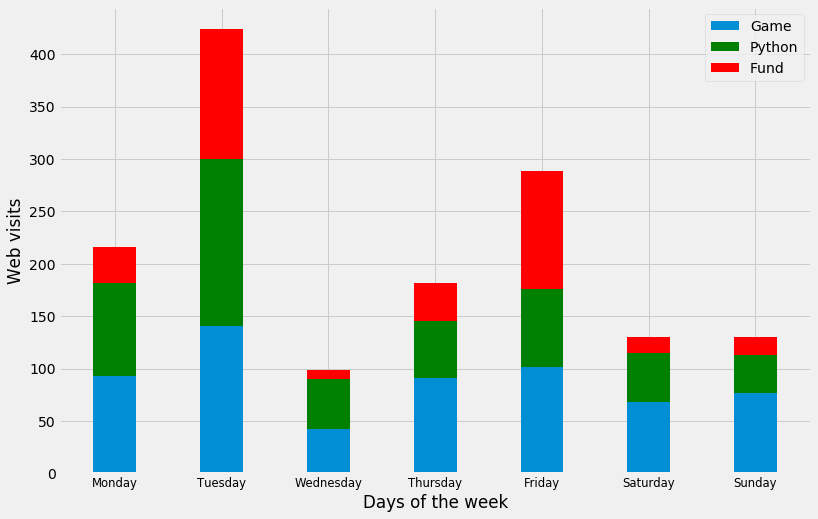

In [27]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Game')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Python')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Fund')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()